

# Project: Investigate a Dataset (FBI Gun Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>The FBI Gun Data is an extract of two database files, one consisting of data from the FBI's National Instant Criminal Background Check System (NICS), which is used to assess a potential buyer's eligibility for firearms and the other consisting of data from the US census for particular periods. These statistics from the NICS table represent the number of firearm background checks initiated through the system and the checks performed  guarantees that buyers have no criminal history and are eligible to purchase weapons. From 1998 through 2017, the data reflects the number of firearm checks performed by state, month, and type of firearm. The NICS dataset presented above is complemented with state-level census statistics of United States of America which provides various population variables information. 


### Question(s) for Analysis

>During the course of this report, the following questions will be explored and answered through data analysis of the previously presented datasets: 
- Which 5 states have the hightest gun registration ?
- What is the overall trend of gun checks over time?
- What was the number of gun registration that occurred in 2016? 
- What is the correlation between total gun registration and population estimates in 2016?
- which state has an usual high gun registration?

In [102]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import seaborn as sns
%matplotlib Inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [103]:
# Loading my csv files
gun = pd.read_csv('gun_data.csv')
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [104]:
gun.shape

(12485, 27)

In [105]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [106]:
census = pd.read_csv('US_census_data.csv')
census

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
census.shape

(85, 52)

In [108]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [109]:
# since we are going to be answering questions that relates popultaion size with states
# it is appropriate that we run a check to ascertain the number of states presented in both datasets matches
np.array_equal('gun.state', census.columns[1:])

False

Source: https://www.codingem.com/numpy-compare-arrays/

In [110]:
#thus we check the number of state in the NICS dataset since we already know that of census dataset from the .info() 
len(gun.state.unique())

55

Based on the column display for the census dataset and column 'state' in NICS dataset, it appears that the number of states differs. NICS dataset presents 55 states and US Census dataset presents 50 states.

In [111]:
# detemine the name of the states 
gun_state = np.array([gun.state])
census_state = np.array([census.columns[1:]])
np.setdiff1d(gun_state,census_state)

array(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

source: https://github.com/numpy/numpy/blob/v1.23.0/numpy/lib/arraysetops.py#L788-L830

## Assessing data: Quality
### NICS Table
- incorrect datatype for column 'month' 
- the dataset contains missing values

### US Census Table
- 'Fact Note' column and 'Value Flags' row seems irrelevant to the analysis
- number of states does not tally with that in NICS table
- the dataset contains missing values
- inconsistent use of 'percentage'. Sometimes % symbol used, other times decimal points
- seperators are used for some numerical data and some numerical values are written as integers
- column description with NICS table does match. Hence, it would be tedious merging both tables for the analysis


### Data Cleaning (US Census and NICS Data)

In [112]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# for gun dataframe, check if the 'totals' is equal to the summation of each row
gun.loc[:, 'permit' : 'return_to_seller_other'].sum(axis = 1)

0         32019.0
1          6303.0
2         28394.0
3         17747.0
4        123506.0
           ...   
12480        24.0
12481       361.0
12482       408.0
12483       241.0
12484       107.0
Length: 12485, dtype: float64

In [113]:
gun['totals']

0         32019
1          6303
2         28394
3         17747
4        123506
          ...  
12480        24
12481       361
12482       408
12483       241
12484       107
Name: totals, Length: 12485, dtype: int64

Source: https://www.activestate.com/resources/quick-reads/how-to-access-a-column-in-a-dataframe-using-pandas/#:~:text=You%20can%20use%20the%20loc,Let's%20see%20how.&text=If%20we%20wanted%20to%20access,in%20order%20to%20retrieve%20it.

In [114]:
#then substracting both result to ascertain equality of the row summation and 'totals' column
(gun.loc[:,'permit':'return_to_seller_other'].sum(axis = 1) - gun['totals'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12480    0.0
12481    0.0
12482    0.0
12483    0.0
12484    0.0
Length: 12485, dtype: float64

In [115]:
# then we check for duplicate entries
gun.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12480    False
12481    False
12482    False
12483    False
12484    False
Length: 12485, dtype: bool

In [116]:
# we then change 'month' column  of string representation to datetime format 
gun_clean = gun.copy()
gun_clean['month'] = pd.to_datetime(gun_clean['month'])
gun_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12461 non-null  float64       
 3   permit_recheck             1100 non-null   float64       
 4   handgun                    12465 non-null  float64       
 5   long_gun                   12466 non-null  float64       
 6   other                      5500 non-null   float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12462 non-null  float64       
 9   prepawn_handgun            10542 non-null  float64       
 10  prepawn_long_gun           10540 non-null  float64       
 11  prepawn_other              5115 non-null   float64       
 12  rede

Source: https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

In [117]:
#now, replace null values with zeros
gun_clean.replace(np.nan, 0, inplace=True)

Source: https://stackoverflow.com/questions/13295735/how-to-replace-nan-values-by-zeroes-in-a-column-of-a-pandas-dataframe

In [118]:
# Test to show that zeros replaced null values 
gun_clean.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [119]:
gun_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  float64       
 3   permit_recheck             12485 non-null  float64       
 4   handgun                    12485 non-null  float64       
 5   long_gun                   12485 non-null  float64       
 6   other                      12485 non-null  float64       
 7   multiple                   12485 non-null  int64         
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

In [120]:
gun_clean.month

0       2017-09-01
1       2017-09-01
2       2017-09-01
3       2017-09-01
4       2017-09-01
           ...    
12480   1998-11-01
12481   1998-11-01
12482   1998-11-01
12483   1998-11-01
12484   1998-11-01
Name: month, Length: 12485, dtype: datetime64[ns]

In [121]:
month = gun_clean.groupby(pd.Grouper(key='month', axis=0, freq='Y')).sum()

Source: https://www.delftstack.com/howto/python-pandas/pandas-groupby-month/

In [122]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [123]:
census.tail(20)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),"Hispanics may be of any race, so also are incl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,(c),Economic Census - Puerto Rico data are not com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Cleaning the Census table
# call up columns with Nan, null, and na
census_clean = census.copy()
census_clean.isnull()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
81,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
82,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
83,False,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [125]:
# delete column 'Fact Note'  as it is irrelevant to our analysis
census_clean.pop('Fact Note')

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
                            ...                        
80               Footnote on this item in place of data
81                                        Not available
82      Suppressed; does not meet publication standards
83                                       Not applicable
84    Value greater than zero but less than half uni...
Name: Fact Note, Length: 85, dtype: object

In [126]:
census_clean.tail(20)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,(c),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# we drop index 65 to 84 as it contains NaN
# It would not be required for our analysis
census_clean=census_clean.dropna()
census_clean.tail(10)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
55,"All firms, 2012","374,153","68,032","499,926","231,959","3,548,449","547,352","326,693","73,418","2,100,187",...,81314,550453,"2,356,748","251,419","75,827","653,193","541,522","114,435","432,980","62,427"
56,"Men-owned firms, 2012","203,604","35,402","245,243","123,158","1,852,580","284,554","187,845","38,328","1,084,885",...,42418,302249,"1,251,696","132,163","41,270","353,012","262,650","63,112","236,252","30,039"
57,"Women-owned firms, 2012","137,630","22,141","182,425","75,962","1,320,085","194,508","106,678","23,964","807,817",...,23722,195694,"866,678","76,269","23,417","236,290","187,677","39,065","133,859","19,344"
58,"Minority-owned firms, 2012","92,219","13,688","135,313","35,982","1,619,857","85,849","56,113","14,440","926,112",...,4101,105234,"1,070,392","24,423","2,354","185,043","92,807","5,777","40,507","4,077"
59,"Nonminority-owned firms, 2012","272,651","51,147","344,981","189,029","1,819,107","442,365","259,614","54,782","1,121,749",...,74228,434025,"1,224,845","218,826","70,491","450,109","426,697","104,785","379,934","55,397"
60,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


Source:https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

In [128]:
# next, we would be transposing all columns with name of states into rows while the properties of 'Fact' column becomes the row
census_clean = census_clean.T
census_clean

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""


Source pandas: Transpose DataFrame -swap,rows,and columns [note.nkmk.me]

Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [129]:
# replace Nan with zeros then test 
census_clean.replace(np.nan, 0, inplace=True)
census_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Fact to Wyoming
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       51 non-null     object
 1   1       51 non-null     object
 2   2       51 non-null     object
 3   3       51 non-null     object
 4   4       51 non-null     object
 5   5       51 non-null     object
 6   6       51 non-null     object
 7   7       51 non-null     object
 8   8       51 non-null     object
 9   9       51 non-null     object
 10  10      51 non-null     object
 11  11      51 non-null     object
 12  12      51 non-null     object
 13  13      51 non-null     object
 14  14      51 non-null     object
 15  15      51 non-null     object
 16  16      51 non-null     object
 17  17      51 non-null     object
 18  18      51 non-null     object
 19  19      51 non-null     object
 20  20      51 non-null     object
 21  21      51 non-null     object
 22  22      51 non-null     o

In [130]:
#Replace ',' in the numeraical values to ''  
census_clean = census_clean.apply(lambda x: x.str.replace(',','').str.strip(' ').str.strip(" ")
                                  .str.strip('$').str.replace('D','0').str.replace('FN','0').str.replace('Z','0').str.strip('-'))
census_clean

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Fact,Population estimates July 1 2016 (V2016),Population estimates base April 1 2010 (V2016),Population percent change - April 1 2010 (esti...,Population Census April 1 2010,Persons under 5 years percent July 1 2016 (V2...,Persons under 5 years percent April 1 2010,Persons under 18 years percent July 1 2016 (V...,Persons under 18 years percent April 1 2010,Persons 65 years and over percent July 1 2016...,Persons 65 years and over percent April 1 2010,...,All firms 2012,Men-owned firms 2012,Women-owned firms 2012,Minority-owned firms 2012,Nonminority-owned firms 2012,Veteran-owned firms 2012,Nonveteran-owned firms 2012,Population per square mile 2010,Land area in square miles 2010,FIPS Code
Alabama,4863300,4780131,1.70%,4779736,6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
Alaska,741894,710249,4.50%,710231,7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,"""02"""
Arizona,6931071,6392301,8.40%,6392017,6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08,"""04"""
Arkansas,2988248,2916025,2.50%,2915918,6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,231959,123158,75962,35982,189029,25915,192988,56,52035.48,"""05"""
California,39250017,37254522,5.40%,37253956,6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,3548449,1852580,1320085,1619857,1819107,252377,3176341,239.1,155779.22,"""06"""
Colorado,5540545,5029324,10.20%,5029196,6.10%,6.80%,22.80%,24.40%,13.40%,10.90%,...,547352,284554,194508,85849,442365,51722,469524,48.5,103641.89,"""08"""
Connecticut,3576452,3574114,0.10%,3574097,5.20%,5.70%,21.10%,22.90%,16.10%,14.20%,...,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36,"""09"""
Delaware,952065,897936,6.00%,897934,5.80%,6.20%,21.50%,22.90%,17.50%,14.40%,...,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54,"""10"""
Florida,20612439,18804592,9.60%,18801310,5.50%,5.70%,20.10%,21.30%,19.90%,17.30%,...,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76,"""12"""


In [131]:
census_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Fact to Wyoming
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       51 non-null     object
 1   1       51 non-null     object
 2   2       51 non-null     object
 3   3       51 non-null     object
 4   4       51 non-null     object
 5   5       51 non-null     object
 6   6       51 non-null     object
 7   7       51 non-null     object
 8   8       51 non-null     object
 9   9       51 non-null     object
 10  10      51 non-null     object
 11  11      51 non-null     object
 12  12      51 non-null     object
 13  13      51 non-null     object
 14  14      51 non-null     object
 15  15      51 non-null     object
 16  16      51 non-null     object
 17  17      51 non-null     object
 18  18      51 non-null     object
 19  19      51 non-null     object
 20  20      51 non-null     object
 21  21      51 non-null     object
 22  22      51 non-null     o

In [132]:
# Next we need to drop the 5 states that was identified earlier as absent in the census table from the NICS table 
gun_clean = gun_clean[gun_clean['state'] != 'Guam']
gun_clean = gun_clean[gun_clean['state'] != 'District of Columbia']
gun_clean = gun_clean[gun_clean['state'] != 'Mariana Islands']
gun_clean = gun_clean[gun_clean['state'] != 'Puerto Rico']
gun_clean = gun_clean[gun_clean['state'] != 'Virgin Islands']
gun_clean.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


Source: https://stackoverflow.com/questions/40083266/replace-comma-with-dot-pandas


Source: https://datascienceparichay.com/article/pandas-delete-rows-based-on-column-values/

In [133]:
month = gun_clean.groupby(pd.Grouper(key='month', axis=0, freq='Y')).sum()
month 

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
month,,,,,,,,,,,,,,,,,,,,,
1998-12-31,78169.0,0.0,219595.0,582682.0,0.0,8711,2219.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,891376
1999-12-31,1037700.0,0.0,2532511.0,5216320.0,0.0,103669,148115.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9038315
2000-12-31,1227814.0,0.0,2187581.0,4778762.0,0.0,95681,131648.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8421486
2001-12-31,1408338.0,0.0,2161166.0,4941982.0,0.0,96984,100126.0,1274.0,3266.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8812457
2002-12-31,1363211.0,0.0,1838239.0,4407866.0,0.0,92892,76776.0,5082.0,11080.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8358574
2003-12-31,1403496.0,0.0,1844597.0,4381438.0,0.0,99034,69946.0,5146.0,8656.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8393942
2004-12-31,1345672.0,0.0,1984064.0,4505326.0,0.0,101737,51559.0,3943.0,6459.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8571726
2005-12-31,1350193.0,0.0,2234171.0,4582776.0,0.0,109549,13158.0,3151.0,5782.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8857599
2006-12-31,2036569.0,0.0,2434038.0,4787683.0,0.0,129897,41792.0,3146.0,5917.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9982755


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which 5 states have the hightest gun registration?)

In [134]:
# first extract the totals by state in a descending order
gun_reg= gun_clean.groupby(['state'], as_index=False)["totals"].sum()
gun_reg=gun_reg.sort_values('totals', ascending = False).head(5)
gun_reg

,state,totals
16,Kentucky,29762434
42,Texas,19435186
4,California,19014063
12,Illinois,15471534
37,Pennsylvania,13133876


In [135]:
# then represent this with a pie chart
fig = px.pie(gun_reg,names='state',values = 'totals', color_discrete_sequence=px.colors.sequential.RdBu,
             #color_discrete_sequence = ['#1c4e80","#0091d5'],
             width=600, height=500)
fig.show()

we can see from the pie chart that Kentucky with 30.7%, Texas with 20.1%, California with 19.6%, Illinois with 16%, and Pennsylvania with 13.6% are the states with the highest gun registration.

### Research Question 2  (What is the overall trend of gun check over time?)

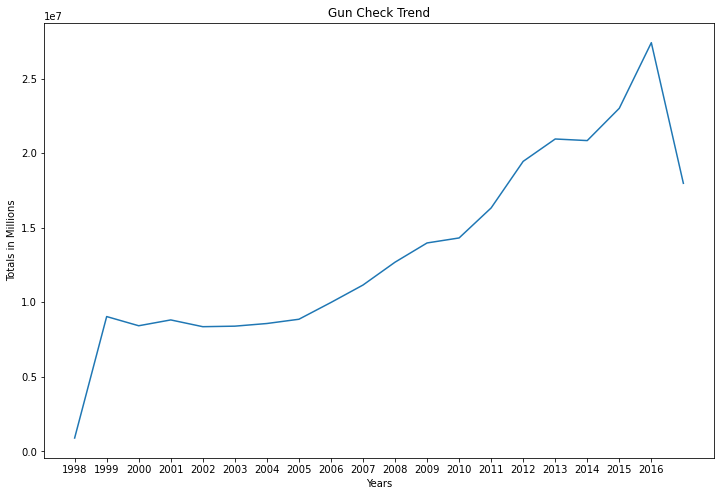

In [136]:
# plot a line graph to show the trend of gun check over the years
plt.subplots(figsize=(12,8))

gun_trend = gun_clean.groupby(gun_clean.month.dt.year).totals.sum().plot()

plt.title('Gun Check Trend')
plt.xlabel('Years')
plt.ylabel('Totals in Millions')
plt.xticks(np.arange(1998,2017));

The above plot shows the increasing rise in the population of likely firearm buyer from 1997 to 2016. A sharp decline was noticed in 2016. 

### Research Question 3  (What was the number of gun registration that occurred  2016 ? )

In [137]:
# create year variable
gun_clean['year']=gun_clean['month'].dt.year
# groupby to generate annual data
gun_annual=gun_clean.groupby(['state', 'year']).sum()
# select year 2016
gun_annual_2016=gun_annual.query('year==2016').reset_index('year', drop=True).totals
gun_annual_2016.sort_values(ascending= False)

state
Kentucky          3676847
California        2377167
Illinois          1924070
Texas             1721726
Indiana           1436725
Florida           1435340
Pennsylvania      1143220
Ohio               875724
Tennessee          714774
Washington         713996
Minnesota          651599
Missouri           632319
Alabama            616947
Georgia            612985
North Carolina     601445
Michigan           579605
Wisconsin          561819
Colorado           540514
Virginia           528369
Arizona            416279
New York           404772
South Carolina     402978
Louisiana          391869
Oklahoma           364590
Oregon             324708
Connecticut        317692
Utah               294907
Mississippi        276161
Arkansas           266014
West Virginia      242350
Massachusetts      226212
Iowa               202277
Kansas             196548
Maryland           165367
New Hampshire      165164
New Mexico         161216
Idaho              156343
Nevada             147992
Montan

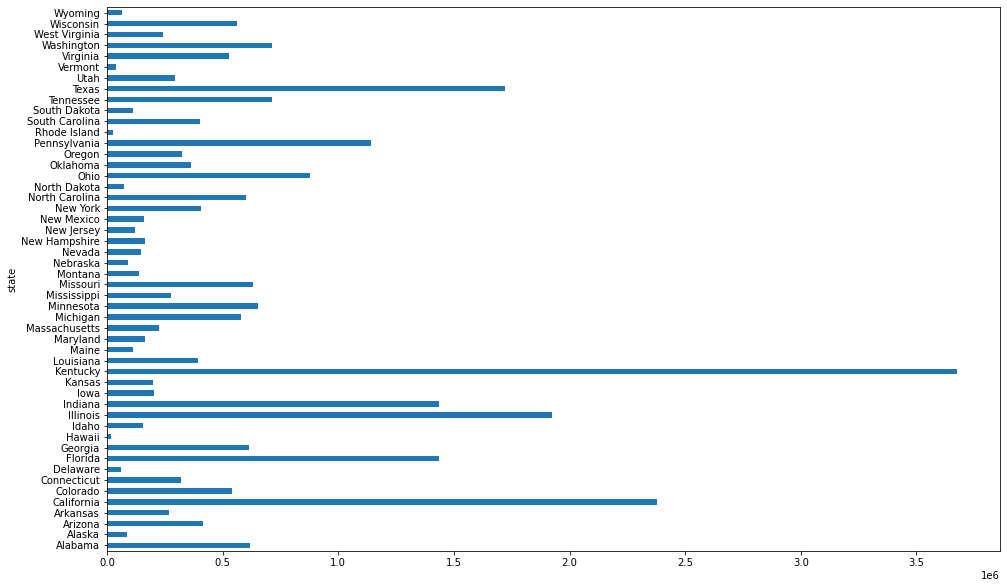

In [138]:
# this brings us to the question of which state contributed the most to the total gun registration in 2016

fig = plt.figure(figsize = (16, 10))
 
# creating the bar plot
gun_annual_2016.plot(kind= 'barh', width = 0.5);

Kentucky has the highest gun regristration in 2016

#### Research Question 4  (What is the correlation between total gun registration and population estimates in 2016)

In [170]:
#get 2016 gun dataset
gun_annual_2016=gun_annual.query('year==2016')
gun_annual_2016=gun_annual_2016.drop(gun_annual_2016.columns[0:-1], axis = 1).reset_index()
gun_annual_2016

,state,year,totals
0,Alabama,2016,616947
1,Alaska,2016,87647
2,Arizona,2016,416279
3,Arkansas,2016,266014
4,California,2016,2377167
5,Colorado,2016,540514
6,Connecticut,2016,317692
7,Delaware,2016,59430
8,Florida,2016,1435340
9,Georgia,2016,612985


In [140]:
# get 2016 population estimate
census_clean_2016=census_clean.drop(census_clean.columns[1:], axis = 1).reset_index()
census_clean_2016.columns.values[0]= 'state'
census_clean_2016.columns.values[1]= 'population'
census_clean_2016=census_clean_2016.drop([0], axis=0)
census_clean_2016

,state,population
1,Alabama,4863300
2,Alaska,741894
3,Arizona,6931071
4,Arkansas,2988248
5,California,39250017
6,Colorado,5540545
7,Connecticut,3576452
8,Delaware,952065
9,Florida,20612439
10,Georgia,10310371


In [171]:
# merge the two dataframes
x=gun_annual_2016
y=census_clean_2016

fbi_gun= x.merge(y, how='outer', on='state')
fbi_gun

,state,year,totals,population
0,Alabama,2016,616947,4863300
1,Alaska,2016,87647,741894
2,Arizona,2016,416279,6931071
3,Arkansas,2016,266014,2988248
4,California,2016,2377167,39250017
5,Colorado,2016,540514,5540545
6,Connecticut,2016,317692,3576452
7,Delaware,2016,59430,952065
8,Florida,2016,1435340,20612439
9,Georgia,2016,612985,10310371


In [148]:
fbi_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       50 non-null     object
 1   year        50 non-null     int64 
 2   population  50 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [154]:
#change population to a float
fbi_gun.population=fbi_gun.population.astype(float)
fbi_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       50 non-null     object 
 1   year        50 non-null     int64  
 2   population  50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


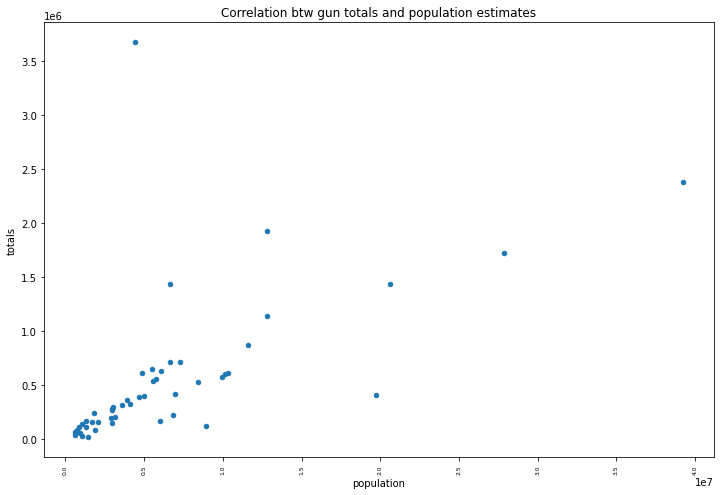

In [180]:
# find the correlation between the gun totals and the population estimates of 2016
# to view the scattered plot clearly, we would rotate the angle of the plot
fbi_gun.population=fbi_gun.population.astype(float)
fbi_gun.plot.scatter(x='population', y='totals',figsize=(12,8), title = 'Correlation btw gun totals and population estimates');
plt.xticks(rotation=90, fontsize=6);



<Figure size 864x576 with 0 Axes>

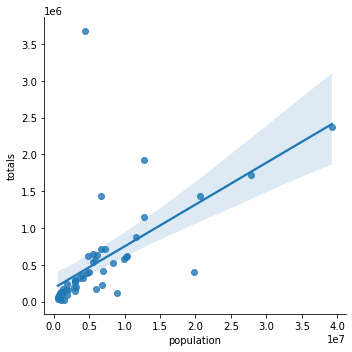

In [184]:
# to  ascertain the trend in the relation between the population and 2016 annual gun registration noted from the plot
# a best fit line is introduced using seaborn
plt.figure(figsize=(12,8));
sns.lmplot(x="population", y="totals", data=fbi_gun);


There is a linear relationship between 2016 gun registration total and the population estimates of 2016. It can be said that a positive correlation exists betwen the two variables.However assessing the strength of the correlation from the scatter plot alone might not be accurate. Thus, a motivation for the need to supplement the scatterplot with a numerical measure that will measure the strength of the linear relationship between two quantitative variables have been presented.

In [186]:
# Calculating a correlation matrix
fbi_gun.corr()

,year,totals,population
year,NaN,NaN,NaN
totals,NaN,1.000000,0.605044
population,NaN,0.605044,1.000000


The value of the correlation that we find between the two variables is r = 0.605, which is very close to 1, and thus confirms that indeed the linear relationship is very strong.

#### Research Question 5  (Which state has an usual gun registration?)

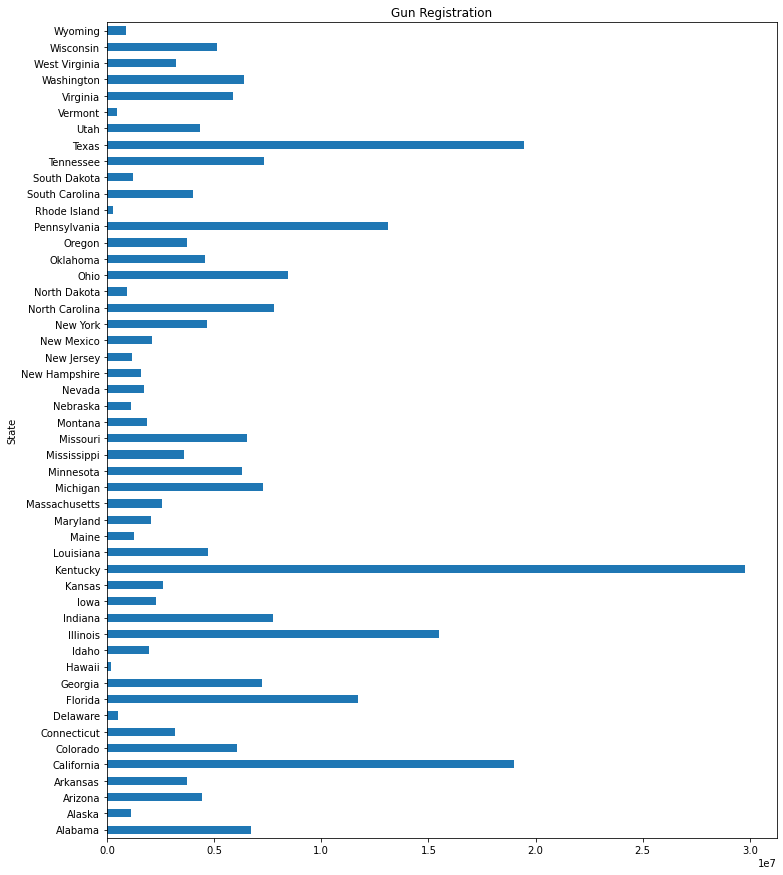

In [98]:
# plot a bar chart to show any usual trend
plt.subplots(figsize=(12,15))
gun_clean.groupby(gun_clean.state).totals.sum().plot(kind ='barh', xlabel='State', ylabel='Total registration', title='Gun Registration');

it can be seen that Kentucky has an usual gun registration over the period.

<a id='conclusions'></a>
## Conclusions

> The analysis was performed using two datasets: data from the FBI's National Instant Criminal Background Check System (NICS), which is used to assess a potential buyer's eligibility for firearms and  data from the US census for particular periods. An indepth analysis could not be performed as there was a limited data available to back the spike in gun registration and reasons for gun purchase. 

>Data cleaning was conducted to make sure our data was tidy in order to provide a good analysis. The following questions were answered from the analysis:
- Which 5 states have the hightest gun registration ?
- What is the overall trend of gun checks over time?
- What was the number of gun registration that occurred in 2016?
- What is the correlation between total gun registration and population estimates in 2016?
- which state has an usual high gun registration?

>One of the finding from the analysis shows that there exist a strong linear positive relationship between 2016 gun registration total and the population estimates of 2016 based on the correlation coefficient calculated. Kentucky seems to have a very high gun registration over the periods analysed but we could not invetigate the reasons for this huge registration data. We could also deduce from the our finding that there was a growing trend with a sharp decline in 2016 in the purchase of firemen but we could not ascertain factors responsible for the growth and decline in the periods analysed. From the finding, Kentucky, Texas, California, Illinois, and Pennsylvania seems to be the states with the highest gun registration over the period under review.
